# Compte rendu numéro 3 -  29-03

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
os.chdir(sys.path[0]+"/..")
cwd = os.getcwd()
print(cwd)

C:\Users\jrusp\Desktop\Code CM


In [5]:
from added import *
from runwatermaze import perform_pearce, plot_pearce
from agents import CombinedAgent

Voilà un condensé des résultats obtenus sur la première expérience de Pearce par quatres modèles différents, qui résultent de la combinaison de stratégies habituelles égocentriques ou allocentriques et de stratégies dirigées vers un but MB ou SR.

Pour chaque modèle des résultats plus complets, avec affichage des performances, champs de vecteurs et analyse de variances sont disponible dans des notebooks spécifiques.

Un dernier notebook "Exp-1 Pearce goal_directed only" comprend les résultats obtenus en simulant une lésion totale du striatum dorsolatéral, avec un modèle de l'hippocampe MB ou SR.

J'ai obtenu ces résultats sur une version modifiée du code de Geerts, avec les changements notoires suivants:

 - Modification de la distance landmark-plateforme de 0.5 cases (5cm) à 2 cases (20cm)
 - Modification de la position des plateformes dans le labyrinthe
 - Suppression de l'apprentissage latent qui était simulé dans le code fourni par Geerts
 - Nombre de pas maximum passé de 1000 à 500
 - Les agents sont forcés d'effectué une transition d'un état voisin de la plateforme à cette dernière si les 500 pas sont dépassés
 - Les agents démarrent chaque épisode à un des quatres points cardinaux de manière aléatoire. L'ensemble des points cardinaux est visité à chaque session. Avant, le départ se faisait à un point aléatoire de la bordure du labyrinthe, à la condition qu'il soit suffisament éloigné de la plateforme.
 - Changements de la majorité des paramêtres présents dans le code de Geerts et dans l'appendix de l'article. 
 

### Première expérience de Pearce avec les stratégies originales de Geerts: ego-MF et SR

In [19]:
exp = "first_exp_pearce"
maze_size = 10
n_sessions = 11
n_trials = 4
n_agents = 100
mf_allo = False
sr_lr = 0.07
q_lr = 0.07
inv_temp = 16
gamma = 0.95
eta = 0.03 # reliability learning rate
mpe = 1 # maximum prediction error
A_alpha = 1.8 # Steepness of transition curve MF to SR 
A_beta = 1.1 # Steepness of transition curve SR to MF 
landmark_dist = 4
HPCmode = "SR"
time_limit = 500
starting_points = [243,230,270,257]

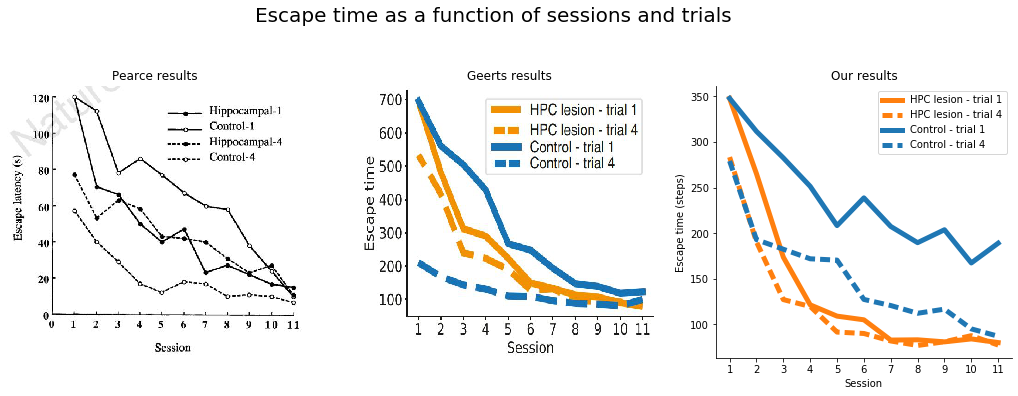

In [7]:
plot_pearce(exp, maze_size, n_trials, n_sessions, n_agents, mf_allo, sr_lr, q_lr, inv_temp, gamma, eta, mpe, A_alpha, A_beta, landmark_dist, HPCmode, time_limit, starting_points)

Les résultats de l'ANOVA sont les mêmes que dans l'article de Pearce, il y a un effet principal positif de session, de trial pour l'individu sain, et seulement de session pour le groupe lésé. 
Par rapport aux résultats de Geerts, le fit général est plutôt mauvais. 
- L'abandon de l'apprentissage latent à fait chuter les performances des individus contrôle au premières sessions pour les trials 2,3 et 4
- La chute du nombre de pas nécessaires pour trouver la plateforme par rapport aux résultats originaux de Geerts s'explique par le rapprochement des plateformes, l'utilisation de départs aux points cardinaux et la suppression d'une distance minimale du point de départ à la plateforme
- Les performances de "Control - trial 1" à la session 11 ne rattrapent pas celles des autres conditions

In [20]:
n_sessions = 25

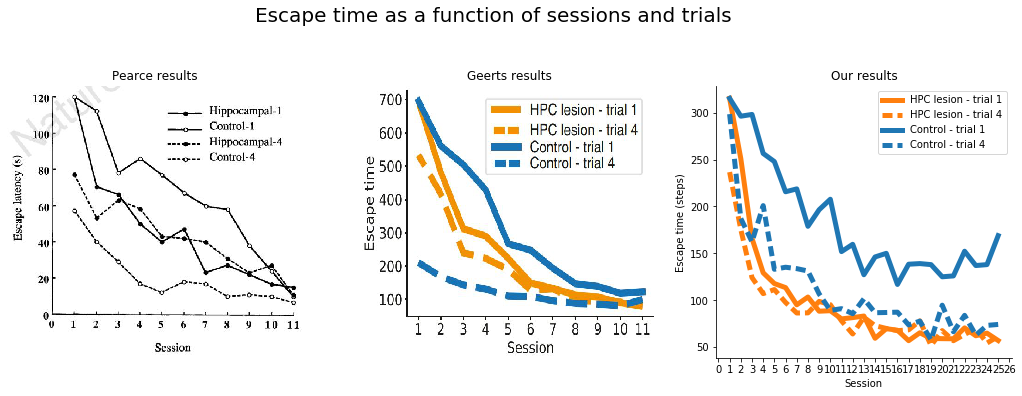

In [21]:
plot_pearce(exp, maze_size, n_trials, n_sessions, n_agents, mf_allo, sr_lr, q_lr, inv_temp, gamma, eta, mpe, A_alpha, A_beta, landmark_dist, HPCmode, time_limit, starting_points)

### Première expérience de Pearce avec stratégies allo-MF et SR

In [22]:
mf_allo = True
n_sessions = 11

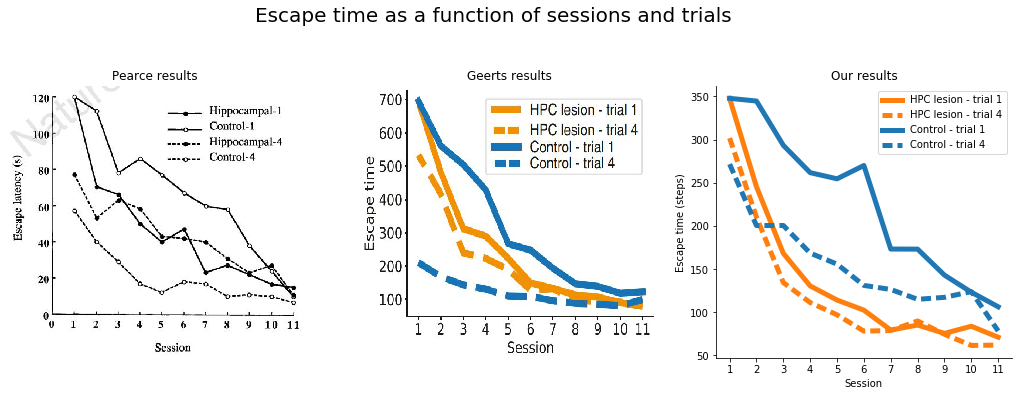

In [18]:
plot_pearce(exp, maze_size, n_trials, n_sessions, n_agents, mf_allo, sr_lr, q_lr, inv_temp, gamma, eta, mpe, A_alpha, A_beta, landmark_dist, HPCmode, time_limit, starting_points)

Même résultats que précedemment, toutefois ici les performances de "Control - trial 1" rattrapent celles des autres conditions. Ce modèle semble être un meilleur candidat que le précédent. Je pense qu'il est possible sur ce modèle que j'arrive à trouver des paramêtres (notamment learning-rates) permettant d'obtenir un meilleur fit.

In [23]:
n_sessions = 25

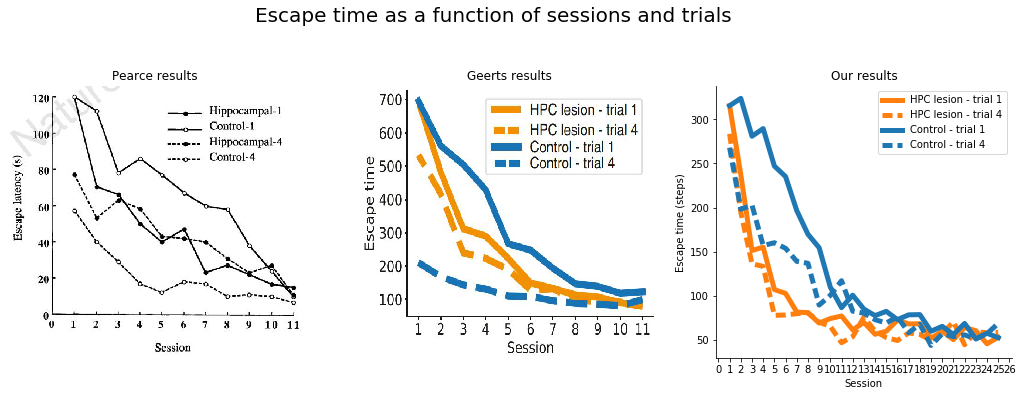

In [24]:
plot_pearce(exp, maze_size, n_trials, n_sessions, n_agents, mf_allo, sr_lr, q_lr, inv_temp, gamma, eta, mpe, A_alpha, A_beta, landmark_dist, HPCmode, time_limit, starting_points)

### Première expérience de Pearce avec stratégies ego-MF et MB

In [11]:
n_session = 11
mf_allo = False
HPCmode = "MB"

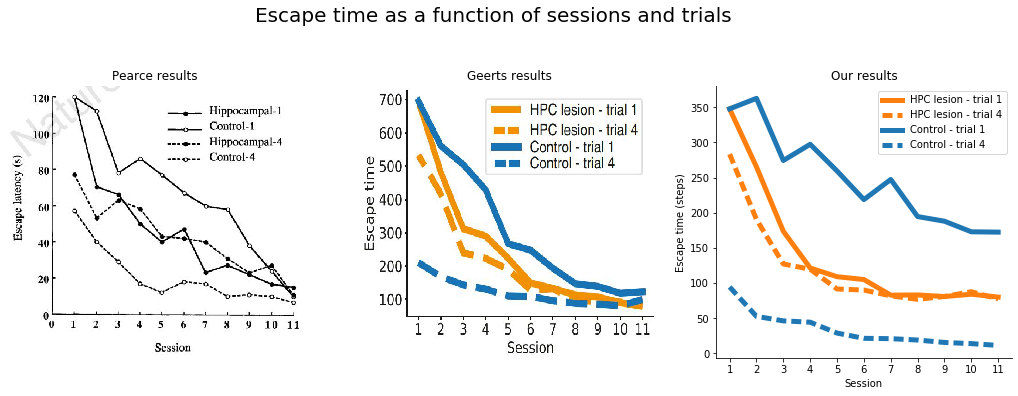

In [12]:
plot_pearce(exp, maze_size, n_trials, n_sessions, n_agents, mf_allo, sr_lr, q_lr, inv_temp, gamma, eta, mpe, A_alpha, A_beta, landmark_dist, HPCmode, time_limit, starting_points)

Même problème qu'avec le modéle égo-MF/SR, les performances de "Control - trial 1" ne rejoignent pas les autres conditions. Les performances de l'agent sain sont bien meilleures que l'individu lésé après update de la reward function (trial 2, 3 et 4), cela pourrait être modifié par l'ajout de bruit dans l'apprentissage du modèle ... etc

### Première expérience de Pearce avec stratégies allo-MF et MB

In [13]:
mf_allo = True

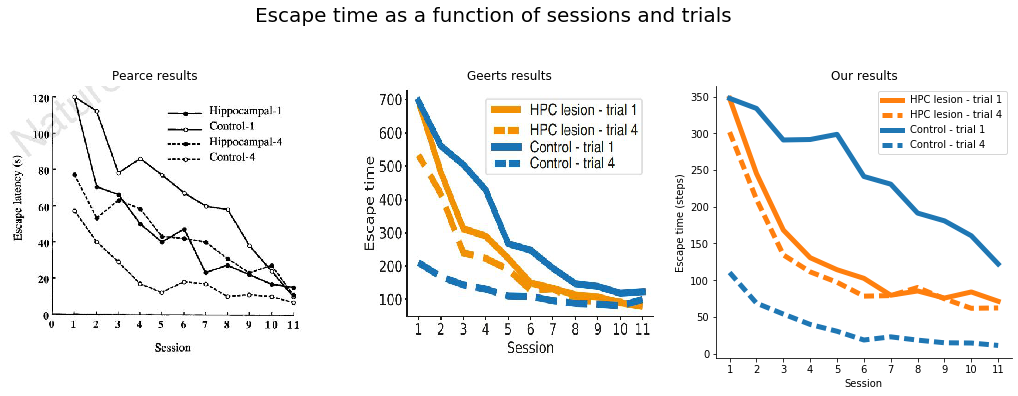

In [14]:
plot_pearce(exp, maze_size, n_trials, n_sessions, n_agents, mf_allo, sr_lr, q_lr, inv_temp, gamma, eta, mpe, A_alpha, A_beta, landmark_dist, HPCmode, time_limit, starting_points)

Meilleur fit qu'avec le modèle égo-MF/MB, l'interaction entre allo-MF et MB permet à la condition "Control - trial 1" d'obtenir de meilleures performances dans les dernières sessions. L'origine de ces meilleurs résultats ne me semble pas évidente, en effet les groupes d'agents lésés à l'hippocampe montrent les mêmes performances, qu'ils utilisent une stratégie alocentrée ou égocentrée.

Sur toutes les simulations, on peut voir que le nombre de pas moyens aux premiers épisodes est de 350 pas, le maximum étant de 500. Quand le maximum était de 1000, le nombre de pas aux premiers épisodes était de 500.
Bien sûr cette diminution du nombre de pas moyen avec le nombre de pas maximum à pour origine le mécanisme même de la moyenne. 
Cependant, ce que l'on observe dans les résultats expérimentaux de Pearce, c'est un temps moyen dans le labyrinthe au premier épisode correspondant exactement au temps maximal autorisé. Après avoir regardé des vidéos de rats découvrant le water-maze pour la première fois je pense que ça a pour origine le fait que les rats restents systématiquement au bord de la piscine tant qu'il n'ont pas découvert pour la première fois l'existence d'une plateforme invisible.